<a href="https://colab.research.google.com/github/CatIsOutOfTheBag/ExamplesDS/blob/main/CatBoostClassifier_ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data download

https://www.kaggle.com/datasets/shubh0799/churn-modelling
https://drive.google.com/file/d/1muTUfrPYTfbntA6B4Br2qEtu4us-f4CC/view?usp=sharing

In [2]:
! gdown 1muTUfrPYTfbntA6B4Br2qEtu4us-f4CC

Downloading...
From: https://drive.google.com/uc?id=1muTUfrPYTfbntA6B4Br2qEtu4us-f4CC
To: /content/Churn_Modelling.csv
100% 685k/685k [00:00<00:00, 83.3MB/s]


In [3]:
import pandas as pd
df = pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Analysis

In [5]:
len(df)

10000

In [6]:
df.isna().mean()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [7]:
df['Exited'].value_counts(normalize=True) # отток в процентах
df['Exited'].mean()

0.2037

# Data Split

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.6, random_state=42)
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [9]:
print(len(train))
print(len(test))
print(len(val))

6000
2000
2000


In [10]:
# проверим доли отточных клиентов в разбивке
print(train['Exited'].mean())
print(test['Exited'].mean())
print(val['Exited'].mean())

0.2045
0.215
0.19


In [11]:
# видим, что чем меньше выборка, тем меньше доля.
# зафиксируем долю отточных клиентов с помощью стратификации
train, test = train_test_split(df, train_size=0.6, random_state=42, stratify=df['Exited'])
val, test = train_test_split(test, train_size=0.5, random_state=42, stratify=test['Exited'])

In [12]:
# проверим доли отточных клиентов в разбивке
print(train['Exited'].mean())
print(test['Exited'].mean())
print(val['Exited'].mean())

0.20366666666666666
0.2035
0.204


# Phik analysis
Отберем наиболее важные переменные для анализа

In [13]:
train_full = pd.concat([train, val])
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6851,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0
7026,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0
5705,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0
9058,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0
9415,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0
6727,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1
4745,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1
1307,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0


In [14]:
! pip install phik
import phik
phik_overview = train_full.phik_matrix()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 690 kB 7.4 MB/s 
interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


/usr/local/lib/python3.7/dist-packages/phik/data_quality.py:62: UserWarning: The number of unique values of variable Surname is large: 2591. Are you sure this is not an interval variable? Analysis for pairs of variables including Surname can be slow.
  col, df[col].nunique()


In [15]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# Human Education
три важнейшие по мнению phik фичи     

In [16]:
# NumOfProducts      
train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])

,count,mean
NumOfProducts,,
1,4060,0.275369
2,3673,0.077049
3,219,0.826484
4,48,1.000000


In [17]:
t = train_full.groupby('NumOfProducts')['Exited'].agg(['count', 'mean'])
sum(t['count']) # все наблюдения на месте - контрольная сумма

8000

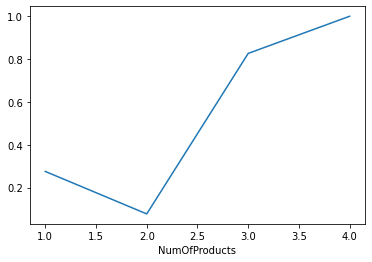

In [18]:
train_full.groupby('NumOfProducts')['Exited'].mean().plot()
# клиенты с 3 и 4 продуктами более склонны к оттоку
# клиенты с 2 продуктами наиболее стабильны

In [19]:
# возьмем эти средние значения за начальные скоры - склонности клиентов к оттоку
# в данном случае эти скоры можно интерпретировать как вероятности оттока
model = train_full.groupby('NumOfProducts')['Exited'].mean().reset_index()

In [20]:
model

,NumOfProducts,Exited
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [21]:
model = model.rename({'Exited': 'score_NumProd'}, axis=1)

In [22]:
model

,NumOfProducts,score_NumProd
0,1,0.275369
1,2,0.077049
2,3,0.826484
3,4,1.000000


In [23]:
# приджойним модель к трейну
train_full.merge(model, how='left', on='NumOfProducts')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049


In [24]:
train_full = train_full.merge(model, how='left', on='NumOfProducts')

In [25]:
# из скора в будущеи мы получим значение таргета(0 или 1), выбрав пороговое значение,
# например, >0.5 -> 1

# Baseline

In [26]:
# за бэйзлайн традиционно возьмем среднее по выборке
train_full['base_score_mean'] = train_full['Exited'].mean()

In [27]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,base_score_mean
0,6852,15779103,Cantamessa,527,Germany,Female,39,9,96748.89,2,1,0,94711.43,0,0.077049,0.20375
1,7027,15588123,Horton,677,France,Female,27,2,0.00,2,0,1,114685.92,0,0.077049,0.20375
2,5706,15698703,Doherty,628,Germany,Male,40,5,181768.32,2,1,1,129107.97,0,0.077049,0.20375
3,9059,15802560,Moran,470,Spain,Female,48,6,140576.11,1,1,1,116971.05,0,0.275369,0.20375
4,9416,15750407,Hunt,768,Germany,Female,43,2,129264.05,2,0,0,19150.14,0,0.077049,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,927,15628303,Thurgood,738,Spain,Male,35,3,0.00,1,1,1,15650.73,0,0.275369,0.20375
7996,6728,15610416,Christie,745,France,Female,36,9,0.00,1,1,0,19605.18,1,0.275369,0.20375
7997,4746,15655410,Hinton,768,Germany,Male,49,1,133384.66,1,1,0,102397.22,1,0.275369,0.20375
7998,1308,15638806,Blackburn,645,Spain,Male,49,2,0.00,2,0,0,10023.15,0,0.077049,0.20375


Log_loss metric

In [28]:
from sklearn.metrics import log_loss

In [29]:
log_loss(train_full['Exited'], train_full['base_score_mean'])

0.5055572860042145

In [30]:
log_loss(train_full['Exited'], train_full['score_NumProd'])
# видим, что даже на основе одной фичи ошибка стала ниже 

0.4359616823203511

Uplift metric

In [31]:
# рассчитаем интуитивную для человека метрику uplift
# предположим, что нам необходимо определить 20% наиболее отточных клиентов
# для этого по полученным по фичам скорам мы отсортируем датафрейм по убыванию 
# и возьмем верхушку из 20% самых отточных
# аплифт покажет нам, насколько хорошо скор подсвечивает отточных клиентов,
# опираясь на значение таргета

In [32]:
# возьмем случайные 20 процентов людей - это худший вариант сортировки по скору,
# от которого мы будем отталкиваться
train_full['Exited'].sample(frac=0.2, random_state=42)

2215    0
2582    1
1662    1
3027    0
4343    0
       ..
1079    0
7979    0
1115    0
6093    0
6832    0
Name: Exited, Length: 1600, dtype: int64

In [33]:
# изначальная пропорция отточных клиентов сохраняется на случайной выборке
train_full['Exited'].sample(frac=0.2, random_state=42).mean()

0.210625

In [34]:
# замерим, какую долю отточных клиентов модем найти по случайной выборке
exited_all = train_full['Exited'].sum() # всего отточных клиентов
train_full['Exited'].sample(frac=0.2, random_state=42).sum() / exited_all  # доля подсвеченных случайной выборкой
# видим, что доля пропорциональная всей выборке
# случайная сортировка, конечно же, не дает профита

0.2067484662576687

In [35]:
# отсортируем клиентов на основе скора, сделанного по числу продуктов
train_full.sort_values('score_NumProd', ascending=False)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,base_score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.077049,0.20375
4912,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.077049,0.20375
4913,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.077049,0.20375
4914,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.077049,0.20375


In [36]:
train_full = train_full.sort_values('score_NumProd', ascending=False)

In [37]:
# возьмем топ-20 процентов по этому скору
train_full.head(round(len(train_full) * 0.2))

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,base_score_mean
6946,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,1.000000,0.20375
1245,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,1.000000,0.20375
7056,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,1.000000,0.20375
7847,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,1.000000,0.20375
693,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,1.000000,0.20375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,1590,15617518,Hu,675,Germany,Male,36,7,89409.95,1,1,1,149399.70,0,0.275369,0.20375
7270,3716,15640409,Carpenter,817,Germany,Female,46,0,89087.89,1,0,1,87941.85,1,0.275369,0.20375
7287,2707,15595071,Ramos,696,France,Male,22,9,149777.00,1,1,1,198032.93,0,0.275369,0.20375
7283,9183,15665579,Cartwright,597,France,Female,28,0,142705.95,1,1,0,127233.39,0,0.275369,0.20375


In [38]:
# замерим, какую долю отточных клиентов модем найти по NumProd скору
t = train_full.head(round(len(train_full) * 0.2))
t['Exited'].sum() / exited_all 
# видим, что доля подсвеченных отточных клиентов возросла до 35%

0.3576687116564417

In [39]:
# тогда можно посчитать uplift - прирост качества относительно случаной выборки
0.3576687116564417 / 0.2067484662576687

1.7299703264094954

# Noise

In [40]:
# чтобы для каждого клиента скор был уникальный - нужно добавить шума
# шум будем убавлять, чтобы не превысить 1 и остаться в терминах вероятности

In [41]:
import numpy as np

In [42]:
rng = np.random.default_rng(42)
r = rng.random(len(train_full))/1000

In [43]:
r

array([0.00077396, 0.00043888, 0.0008586 , ..., 0.00047914, 0.00023225,
       0.00095207])

In [44]:
train_full['score_NumProd'] = train_full['score_NumProd'] - r

In [45]:
train_full['score_NumProd'].nunique() # количество уникальных скоров

8000

In [46]:
# создадим функцию для аплифта
def uplift(df, score, pct):
  exited_all = df['Exited'].sum() # всего отточных клиентов в датафрейме
  df = df.sort_values(score, ascending=False) # отсортированный датафрейм
  exited_found = df.head(round(len(df) * pct))['Exited'].sum() # топ pct% датафрейма
  return (exited_found / exited_all) / pct # возврат прироста

In [47]:
uplift(train_full, 'score_NumProd', 0.2) # разница обусловлена рандом сидом

1.8680981595092023

In [48]:
# посмотрим что на тесте
# для этого нужно примерджить модель с score_NumProd к тесту
test = test.merge(model, how='left', on='NumOfProducts') 

In [49]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.275369
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.275369
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.275369
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.275369
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.077049
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.275369
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.077049
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.077049


In [50]:
# и сразу добавим шума
rng = np.random.default_rng(42)
r = rng.random(len(test))/1000
test['score_NumProd'] = test['score_NumProd']-r

log_loss на test

In [51]:
log_loss(test['Exited'], test['score_NumProd'])

0.4338514774627637

In [52]:
uplift(test, 'score_NumProd', 0.2)

1.8796068796068794

Усилим модель новыми переменными

Возраст

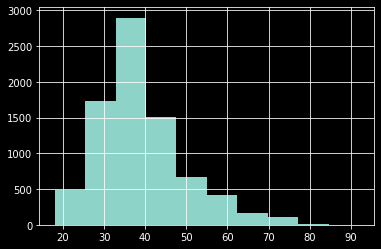

In [53]:
# распределение
import matplotlib.pyplot as plt
plt.style.use('dark_background')
train_full['Age'].hist()

In [54]:
# разобьем на интервалы
# можно использовать qcut to new data
# pd.qcut(train_full['Age'], 5, retbins=True, labels=False)
# так как нам еще применять это на тесте
# но у нас простой случай, сделаем вручную

train_full['age_group'] = pd.cut(train_full['Age'], [0,31,35,40,46,float('inf')])

In [55]:
train_full.groupby('age_group')['Exited'].agg(['count', 'mean'])

,count,mean
age_group,,
"(0.0, 31.0]",1896,0.075422
"(31.0, 35.0]",1424,0.091994
"(35.0, 40.0]",1797,0.146912
"(40.0, 46.0]",1376,0.289971
"(46.0, inf]",1507,0.459854


In [56]:
# чем больше возраст, тем больше отточных клиентов
# расширим модель

In [57]:
model = train_full.groupby(['NumOfProducts', 'age_group'])['Exited'].mean().reset_index()

In [58]:
model = model.rename({'Exited': 'score_NumProd_Age'}, axis=1)

In [59]:
model

,NumOfProducts,age_group,score_NumProd_Age
0,1,"(0.0, 31.0]",0.106774
1,1,"(31.0, 35.0]",0.135908
2,1,"(35.0, 40.0]",0.198646
3,1,"(40.0, 46.0]",0.378873
4,1,"(46.0, inf]",0.542506
5,2,"(0.0, 31.0]",0.029293
6,2,"(31.0, 35.0]",0.031206
7,2,"(35.0, 40.0]",0.059977
8,2,"(40.0, 46.0]",0.106239
9,2,"(46.0, inf]",0.225869


In [60]:
# приджойним модель к трейну
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [61]:
train_full

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,base_score_mean,age_group,score_NumProd_Age
0,6876,15665283,Brookes,610,France,Female,57,7,72092.95,4,0,1,113228.82,1,0.999226,0.20375,"(46.0, inf]",1.000000
1,3153,15724161,Sutton,644,France,Female,40,9,137285.26,4,1,0,77063.63,1,0.999561,0.20375,"(35.0, 40.0]",1.000000
2,2542,15679770,Smith,611,France,Female,61,3,131583.59,4,0,1,66238.23,1,0.999141,0.20375,"(46.0, inf]",1.000000
3,1702,15605279,Francis,792,France,Male,50,9,0.00,4,1,1,194700.81,1,0.999303,0.20375,"(46.0, inf]",1.000000
4,7568,15750545,Chidiebere,629,France,Male,44,5,0.00,4,0,0,117572.59,1,0.999906,0.20375,"(40.0, 46.0]",1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7543,15768777,Wang,507,Spain,Female,34,4,0.00,2,1,1,60688.38,0,0.076710,0.20375,"(31.0, 35.0]",0.031206
7996,4011,15685654,Allan,514,Spain,Male,66,9,0.00,2,1,1,14234.31,0,0.076913,0.20375,"(46.0, inf]",0.225869
7997,4872,15575858,Bergamaschi,763,France,Male,40,3,0.00,2,1,0,134281.11,0,0.076570,0.20375,"(35.0, 40.0]",0.059977
7998,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0.076816,0.20375,"(40.0, 46.0]",0.106239


In [62]:
log_loss(train_full['Exited'], train_full['score_NumProd_Age'])

0.3866695862492173

In [63]:
uplift(train_full, 'score_NumProd_Age', 0.2)

2.7116564417177913

In [64]:
# посчитаем на тесте
test['age_group'] = pd.cut(test['Age'], [0,31,35,40,46,float('inf')])

In [65]:
# приджойним модель к тесту
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group'])

In [66]:
log_loss(test['Exited'], test['score_NumProd_Age'])

0.3870707514157596

In [67]:
uplift(test, 'score_NumProd_Age', 0.2)

2.7518427518427515

Расширим модель еще одной переменной

IsActiveMember

In [68]:
train_full['IsActiveMember'].value_counts()

1    4131
0    3869
Name: IsActiveMember, dtype: int64

In [69]:
train_full.groupby('IsActiveMember')['Exited'].agg(['count', 'mean'])

,count,mean
IsActiveMember,,
0,3869,0.267511
1,4131,0.144033


In [70]:
# неактивные члены группы более отточны

In [71]:
# добавим ее в модель
model = train_full.groupby(['NumOfProducts', 'age_group', 'IsActiveMember'])['Exited'].mean().reset_index()

In [72]:
model = model.rename({'Exited': 'score_NumProd_Age_Active'}, axis=1)

In [73]:
model

,NumOfProducts,age_group,IsActiveMember,score_NumProd_Age_Active
0,1,"(0.0, 31.0]",0,0.143885
1,1,"(0.0, 31.0]",1,0.072687
2,1,"(31.0, 35.0]",0,0.177650
3,1,"(31.0, 35.0]",1,0.094286
4,1,"(35.0, 40.0]",0,0.223714
5,1,"(35.0, 40.0]",1,0.173121
6,1,"(40.0, 46.0]",0,0.466146
7,1,"(40.0, 46.0]",1,0.276074
8,1,"(46.0, inf]",0,0.793103
9,1,"(46.0, inf]",1,0.334016


In [74]:
# приджойним модель к трейну
train_full = train_full.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [75]:
log_loss(train_full['Exited'], train_full['score_NumProd_Age_Active'])

0.36550197514510024

In [76]:
uplift(train_full, 'score_NumProd_Age_Active', 0.2)

2.8496932515337425

In [77]:
# приджойним модель к тесту
test = test.merge(model, how='left', on=['NumOfProducts', 'age_group', 'IsActiveMember'])

In [78]:
# завернем логлосс и аплифт в функцию
def print_metrics(df, score):
  print(log_loss(df['Exited'], df[score]))
  print(uplift(df, score, 0.2))

In [79]:
print_metrics(test, 'score_NumProd_Age_Active')

0.3638472889481342
2.862407862407862


In [80]:
# видим прирост аплифта на скоре от трех фичей

# MACHINE LEARNING

In [81]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 70 kB/s 


In [82]:
from catboost import CatBoostClassifier

In [83]:
# обучимся на фичах из человеческого обучения
train_full.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'score_NumProd',
       'base_score_mean', 'age_group', 'score_NumProd_Age',
       'score_NumProd_Age_Active'],
      dtype='object')

In [84]:
X = ['NumOfProducts', 'Age', 'IsActiveMember']
y = ['Exited']

In [85]:
params = {'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

In [86]:
# все фичи числовые, поэтому список категориальных передавать в катбуст не будем
model = CatBoostClassifier(**params)

In [87]:
model.fit(train[X], train[y], eval_set=(val[X], val[y]))

0:	learn: 0.6849803	test: 0.6849389	best: 0.6849389 (0)	total: 53.1ms	remaining: 53s
100:	learn: 0.3991169	test: 0.3930537	best: 0.3930537 (100)	total: 556ms	remaining: 4.95s
200:	learn: 0.3659581	test: 0.3563817	best: 0.3563817 (200)	total: 998ms	remaining: 3.97s
300:	learn: 0.3589224	test: 0.3476566	best: 0.3476566 (300)	total: 1.17s	remaining: 2.72s
400:	learn: 0.3565171	test: 0.3446648	best: 0.3446648 (400)	total: 1.36s	remaining: 2.04s
500:	learn: 0.3553274	test: 0.3433005	best: 0.3432984 (498)	total: 1.54s	remaining: 1.53s
600:	learn: 0.3544987	test: 0.3425379	best: 0.3425379 (600)	total: 1.73s	remaining: 1.15s
700:	learn: 0.3539638	test: 0.3421168	best: 0.3421135 (699)	total: 1.91s	remaining: 814ms
800:	learn: 0.3532817	test: 0.3419139	best: 0.3419139 (800)	total: 2.08s	remaining: 518ms
900:	learn: 0.3524351	test: 0.3416923	best: 0.3416923 (900)	total: 2.42s	remaining: 266ms
999:	learn: 0.3513546	test: 0.3417688	best: 0.3416551 (927)	total: 2.61s	remaining: 0us

bestTest = 0.341

In [88]:
# CatBoost побеждает человеческое обучение на 0,02

In [89]:
# посчитаем качество на тесте
model.predict_proba(test[X]) # вероятность принадлежности классу 0 / классу 1

array([[0.87273278, 0.12726722],
       [0.83992875, 0.16007125],
       [0.76421314, 0.23578686],
       ...,
       [0.85243229, 0.14756771],
       [0.96002386, 0.03997614],
       [0.95396298, 0.04603702]])

In [90]:
test['score_cat_prod_age_active'] = model.predict_proba(test[X])[:,1]

In [91]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,age_group,score_NumProd_Age,score_NumProd_Age_Active,score_cat_prod_age_active
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274596,"(0.0, 31.0]",0.106774,0.143885,0.127267
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274931,"(31.0, 35.0]",0.135908,0.177650,0.160071
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274511,"(35.0, 40.0]",0.198646,0.223714,0.235787
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274672,"(31.0, 35.0]",0.135908,0.177650,0.160071
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275275,"(31.0, 35.0]",0.135908,0.094286,0.102859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076295,"(46.0, inf]",0.225869,0.134048,0.052185
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.275084,"(35.0, 40.0]",0.198646,0.173121,0.127713
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076714,"(40.0, 46.0]",0.106239,0.144262,0.147568
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076203,"(35.0, 40.0]",0.059977,0.042353,0.039976


In [92]:
# скоры кэтбуста тоже могут быть не уникальны
test['score_cat_prod_age_active'].nunique()

254

In [93]:
print_metrics(test, 'score_cat_prod_age_active') # машинное

0.35878132799643003
2.899262899262899


In [94]:
print_metrics(test, 'score_NumProd_Age_Active') # человеческое обучение

0.3638472889481342
2.862407862407862


# All Features Learning

In [95]:
train.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [96]:
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y = ['Exited']

In [97]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [98]:
cat_features = ['Geography', 'Gender']

In [99]:
# можно заранее подготовит объекты с данными - пул
from catboost import Pool

train_data = Pool(
    data = train[X],
    label = train[y],
    cat_features = cat_features
    )

valid_data = Pool(
    data = val[X],
    label = val[y],
    cat_features = cat_features
    )                 

In [100]:
params = {
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

In [101]:
model = CatBoostClassifier(**params)

In [102]:
model.fit(train_data, eval_set=valid_data)

0:	learn: 0.6848575	test: 0.6849145	best: 0.6849145 (0)	total: 16.2ms	remaining: 16.1s
100:	learn: 0.3908412	test: 0.3894043	best: 0.3894043 (100)	total: 988ms	remaining: 8.8s
200:	learn: 0.3457312	test: 0.3445503	best: 0.3445503 (200)	total: 1.71s	remaining: 6.81s
300:	learn: 0.3288071	test: 0.3307084	best: 0.3307084 (300)	total: 2.62s	remaining: 6.07s
400:	learn: 0.3192987	test: 0.3252459	best: 0.3252459 (400)	total: 3.35s	remaining: 5s
500:	learn: 0.3120470	test: 0.3221057	best: 0.3221057 (500)	total: 4.85s	remaining: 4.83s
600:	learn: 0.3054735	test: 0.3204300	best: 0.3204300 (600)	total: 6.43s	remaining: 4.27s
700:	learn: 0.2997053	test: 0.3192377	best: 0.3192377 (700)	total: 7.23s	remaining: 3.08s
800:	learn: 0.2946934	test: 0.3188206	best: 0.3187917 (794)	total: 8.85s	remaining: 2.2s
900:	learn: 0.2890177	test: 0.3185731	best: 0.3185731 (900)	total: 10.2s	remaining: 1.12s
999:	learn: 0.2831978	test: 0.3186396	best: 0.3185004 (978)	total: 12s	remaining: 0us

bestTest = 0.31850037

In [103]:
# Под капотом CatBoost метрика log_loss
# На валидационном сете мы получили значение логлосс 0,318
# Это заметное улучшение

In [104]:
# посчитаем качество на тесте
model.predict_proba(test[X]) # вероятность принадлежности классу 0 / классу 1

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [105]:
test['score_cat_all_features'] = model.predict_proba(test[X])[:,1]

In [106]:
test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score_NumProd,age_group,score_NumProd_Age,score_NumProd_Age_Active,score_cat_prod_age_active,score_cat_all_features
0,9168,15645353,Chubb,607,France,Male,26,1,0.00,1,1,0,29818.20,0,0.274596,"(0.0, 31.0]",0.106774,0.143885,0.127267,0.131844
1,9388,15594576,Zhdanov,524,France,Male,32,1,144875.71,1,0,0,187740.04,0,0.274931,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.074020
2,6860,15811927,Marcelo,733,France,Female,38,3,157658.36,1,0,0,19658.43,0,0.274511,"(35.0, 40.0]",0.198646,0.223714,0.235787,0.186876
3,3501,15675675,Slate,850,France,Female,32,5,106290.64,1,1,0,121982.73,0,0.274672,"(31.0, 35.0]",0.135908,0.177650,0.160071,0.087403
4,6234,15682914,Bolton,850,France,Male,34,2,72079.71,1,1,1,115767.93,0,0.275275,"(31.0, 35.0]",0.135908,0.094286,0.102859,0.056658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7393,15795079,Nnaife,596,Spain,Male,67,6,0.00,2,1,1,138350.74,0,0.076295,"(46.0, inf]",0.225869,0.134048,0.052185,0.026803
1996,3234,15601550,Genovesi,595,Spain,Male,36,6,85768.42,1,1,1,24802.77,0,0.275084,"(35.0, 40.0]",0.198646,0.173121,0.127713,0.084712
1997,219,15659366,Shih,807,France,Male,43,1,105799.32,2,1,0,34888.04,1,0.076714,"(40.0, 46.0]",0.106239,0.144262,0.147568,0.149411
1998,4756,15740072,Padovesi,720,France,Female,37,2,120328.88,2,1,1,138470.21,0,0.076203,"(35.0, 40.0]",0.059977,0.042353,0.039976,0.063715


In [107]:
print_metrics(test, 'score_cat_all_features') 

0.3296082204006806
3.1449631449631448


In [108]:
# видим прирост и на тестовой выборке

# ИНТЕРПРЕТАЦИЯ МОДЕЛИ

# Feature importance

In [109]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,NumOfProducts,27.408724
1,Age,21.567747
2,Balance,11.455919
3,Geography,10.011145
4,IsActiveMember,7.420335
5,EstimatedSalary,5.163513
6,CustomerId,4.965796
7,CreditScore,4.482999
8,Tenure,3.637201
9,Gender,3.089379


In [110]:
phik_overview['Exited'].sort_values(ascending=False)

Exited             1.000000
NumOfProducts      0.564969
Age                0.498768
IsActiveMember     0.237244
Balance            0.167823
Gender             0.165231
CreditScore        0.105371
Geography          0.104047
CustomerId         0.035477
Tenure             0.030333
RowNumber          0.000000
Surname            0.000000
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

# SHAP

In [111]:
! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 19.5 MB/s 


In [112]:
import shap
shap.initjs()

In [113]:
# рассчитаем shap_values на тесте
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

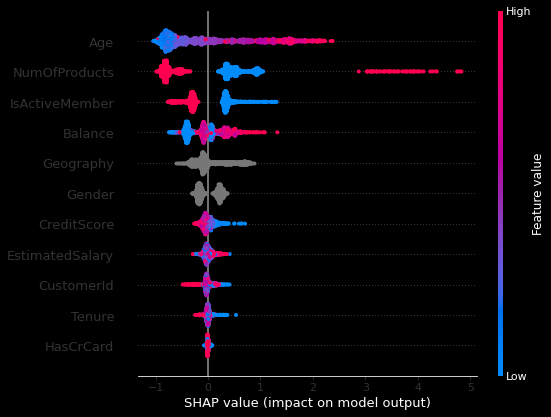

In [114]:
shap.summary_plot(shap_values, test[X])

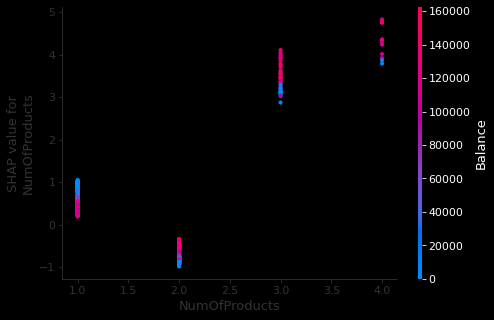

In [115]:
# посмотрим на каждую фичу в отдельности
shap.dependence_plot('NumOfProducts', shap_values, test[X])

In [116]:
# можно вывести все эти графики в порядке убывания важности
model.get_feature_importance(prettified=True)['Feature Id'].values

array(['NumOfProducts', 'Age', 'Balance', 'Geography', 'IsActiveMember',
       'EstimatedSalary', 'CustomerId', 'CreditScore', 'Tenure', 'Gender',
       'HasCrCard'], dtype=object)

In [117]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

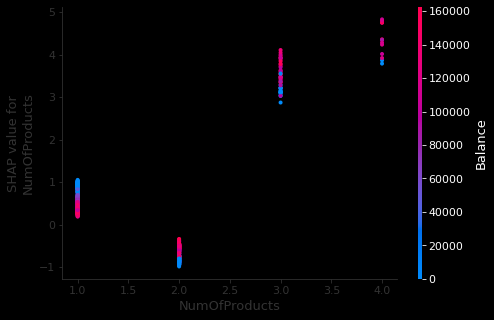

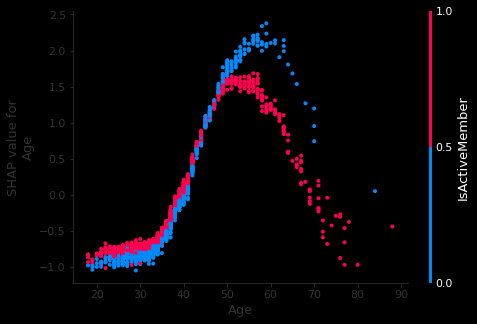

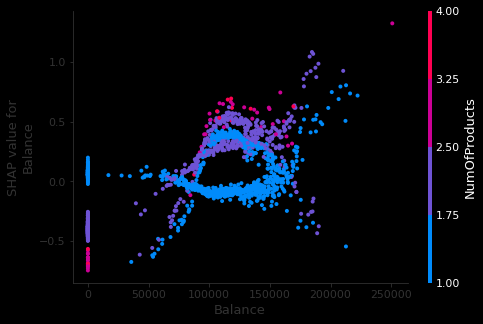

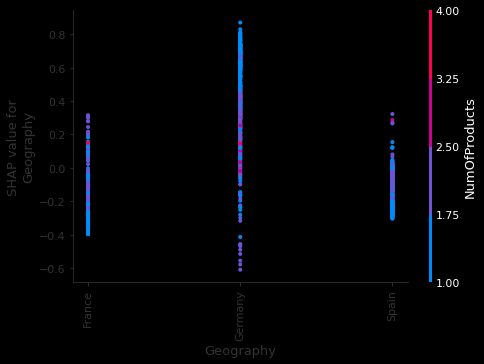

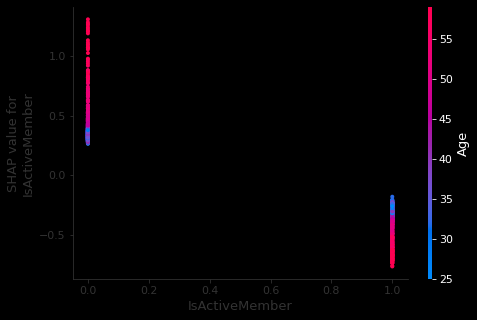

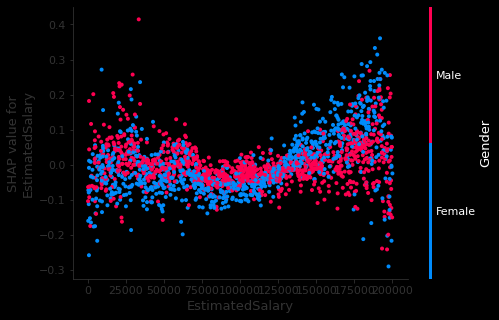

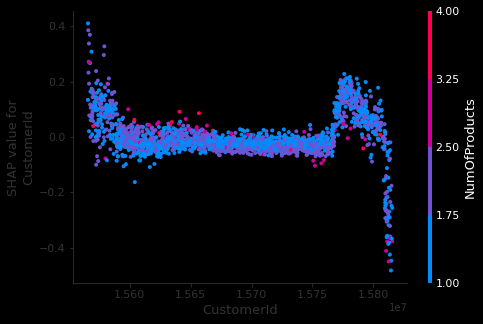

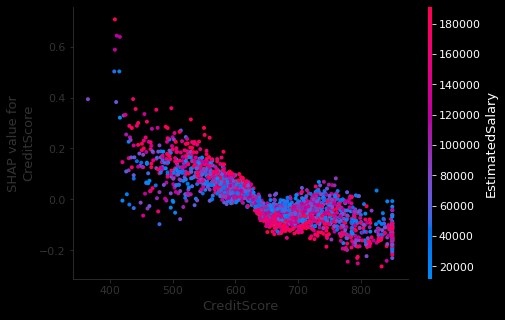

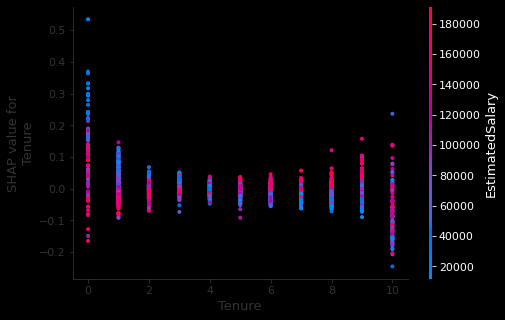

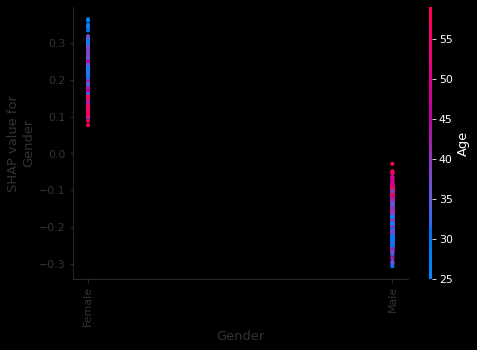

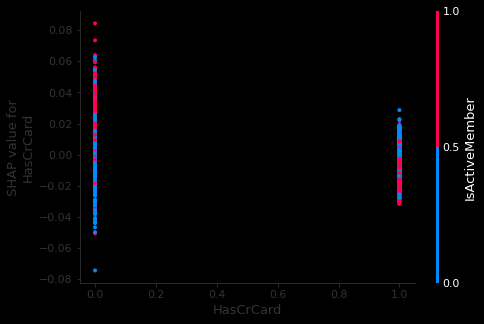

In [118]:
for feature in features:
  shap.dependence_plot(feature, shap_values, test[X])


# Анализ ошибок технически как в регрессии

под капотом кэтбуста - регрессия

в конце непрерывная величина регрессии от -inf до +inf 

перегоняется в некий нормированный скор от 0 до 1

In [119]:
model.predict(test[X], prediction_type='RawFormulaVal') # вот сырая регрессия из-под капота

array([-1.88475323, -2.52652396, -1.47044046, ..., -1.73922605,
       -2.68750234, -2.93959577])

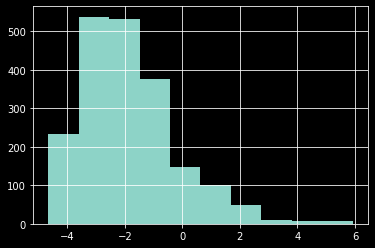

In [120]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).hist()

In [121]:
# для получения скора классификации сырой скор регресии
# преобразуется сигмоидальной функцией
# проверим:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [122]:
pd.Series(model.predict(test[X], prediction_type='RawFormulaVal')).apply(sigmoid)

0       0.131844
1       0.074020
2       0.186876
3       0.087403
4       0.056658
          ...   
1995    0.026803
1996    0.084712
1997    0.149411
1998    0.063715
1999    0.050231
Length: 2000, dtype: float64

In [123]:
model.predict_proba(test[X])

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

In [124]:
# или как вариант можно вот так:
model.predict(test[X], prediction_type='Probability')

array([[0.86815614, 0.13184386],
       [0.92598046, 0.07401954],
       [0.81312433, 0.18687567],
       ...,
       [0.85058873, 0.14941127],
       [0.93628515, 0.06371485],
       [0.94976945, 0.05023055]])

# Метрики классификации

Скор и пороги

In [125]:
# Решение об отточности клиента принимается по конкретному порогу
# так скор преобразуется в конкретный класс

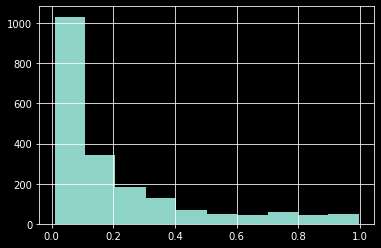

In [126]:
test['score_cat_all_features'].hist() # скор кэтбуста нормирован от 0 до 1, большинство клиентов в нуле, они не отточные

In [127]:
# преобразуем скор в класс
test['y_pred'] = (test['score_cat_all_features'] > 0.5) * 1

In [128]:
test['y_pred'].mean() # мы предсказали 12% отточных клиентов

0.1225

# Матрица ошибок

ключ ко всем метрикам классификации

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
confusion_matrix(test['Exited'], test['y_pred'])

array([[1537,   56],
       [ 218,  189]])

In [131]:
tn, fp, fn, tp = confusion_matrix(test['Exited'], test['y_pred']).ravel()

In [132]:
tn, fp, fn, tp

(1537, 56, 218, 189)

Вот тут можно посмотреть всевозможные метрики классификации на основе матрицы ошибок
https://en.wikipedia.org/wiki/Receiver_operating_characteristic

In [133]:
# важнейшие из них

Recall - полнота

процент угаданных моделью экземпляров 1 класса

TPR = TP / P = TP / (TP + FN)

In [134]:
recall = tp / (tp + fn)
recall # 46% отточных клиентов модель пометит как 1

0.4643734643734644

In [135]:
from sklearn.metrics import recall_score # или из библиотеки
recall_score(test['Exited'], test['y_pred'])

0.4643734643734644

Precision - точность

процент действительных экземпляров первого класса из тех, которые модель пометила 1

PPV = TP / (TP + FP)

In [136]:
precision = tp / (tp + fp)
precision

0.7714285714285715

In [137]:
from sklearn.metrics import precision_score # или из библиотеки
precision_score(test['Exited'], test['y_pred'])

0.7714285714285715

F1 - гармоническое среднее точности и полноты

(2 * recall * precision) / (recall + precision)

Это частный случай F-метрики, в которой параметр betta показывает, насколько recall важнее, чем precision

При betta==1 важность одинакова

In [138]:
from sklearn.metrics import f1_score # из библиотеки
f1_score(test['Exited'], test['y_pred'])

0.5797546012269938

Accuracy - процент правильных ответов

не работает при дисбалансе классов

In [139]:
(test['Exited'] == test['y_pred']).mean()

0.863

In [140]:
(tp + tn) / (tp+tn+fp+fn)

0.863

In [141]:
from sklearn.metrics import accuracy_score # из библиотеки
accuracy_score(test['Exited'], test['y_pred'])

0.863

# Classification report

In [142]:
from sklearn.metrics import classification_report
print(classification_report(test['Exited'], test['y_pred']))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.46      0.58       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [143]:
# все эти метрики посчитаны для порога 0,5 
# проверим что получится для других порогов
test['y_pred_new'] = (test['score_cat_all_features'] > 0.4) * 1

In [144]:
from sklearn.metrics import f1_score
f1_score(test['Exited'], test['y_pred_new'])

0.6104972375690608

In [145]:
# как найти порог с максимальным f1
# количество уникальных скоров + 1 = количество порогов
thrs = [0] + list(test['score_cat_all_features'].unique()) # пороги

In [146]:
# progressbar
from tqdm.notebook import tqdm

In [147]:
result = []
for thr in tqdm(thrs):
  test['y_pred_new'] = (test['score_cat_all_features'] > thr) * 1
  result.append(f1_score(test['Exited'], test['y_pred_new']))


  0%|          | 0/2001 [00:00<?, ?it/s]

In [148]:
result[:5]

[0.3381803074366431,
 0.5536277602523659,
 0.47174447174447176,
 0.5938069216757741,
 0.4940239043824701]

In [149]:
# найдем максимальный f1 и порог для него
max_f1 = 0
for i, thr in enumerate(thrs):
  if result[i] > max_f1:
    max_f1 = result[i]
    threshold = thr
print('max_f1 =', max_f1)
print('threshold =', threshold)  

max_f1 = 0.6367713004484306
threshold = 0.2779316501940879


# ROC

соотношение доли правильных срабатываний к доле ложных срабатываний

TPR по оси y

FPR по оси x

Перебираем все пороги и наносим точку на график ROC кривой - Receiver operating characteristic curve

Порогу ноль соответствует точка (1,1)

In [151]:
from sklearn.metrics import roc_curve

In [153]:
# функция на вход принимает скоры, не классы
# на выходе - массивы fpr, tpr и пороги
fprs, tprs, thrs = roc_curve(test['Exited'], test['score_cat_all_features'])

In [155]:
roc = pd.DataFrame({'fprs': fprs,
                    'tprs': tprs,
                    'thrs': thrs})

In [158]:
roc.sort_values('thrs') # функция добавляет максимальный порог (1,99) и делает предикт через >=

,fprs,tprs,thrs
395,1.000000,1.000000,0.009371
394,0.998745,1.000000,0.009809
393,0.998745,0.997543,0.009886
392,0.979912,0.997543,0.012198
391,0.979912,0.995086,0.012212
...,...,...,...
4,0.000628,0.120393,0.891551
3,0.000628,0.061425,0.933203
2,0.000000,0.061425,0.933737
1,0.000000,0.002457,0.997318


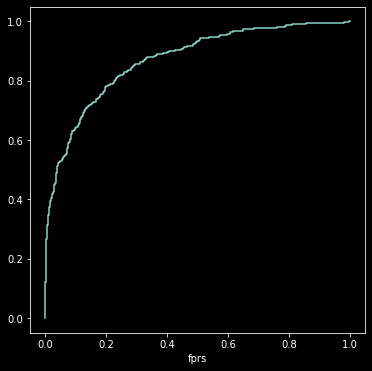

In [163]:
# построим график
roc.set_index('fprs')['tprs'].plot(figsize=(6,6)) # можно вот так

In [ ]:
# а можно по-другому

In [173]:
roc['ideal'] = 1 # идеальная модель, когда tprs всегда 1
roc['random'] = roc['fprs'] # x=y для случайной модели -> прямая под 45*

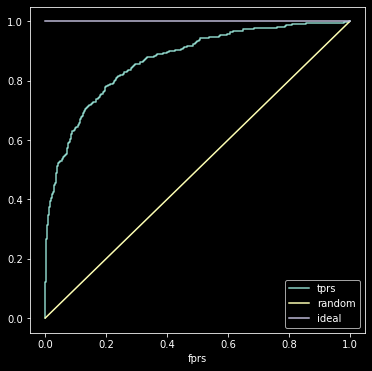

In [174]:
roc.plot(x='fprs', y=['tprs', 'random', 'ideal'], figsize=(6,6)) 

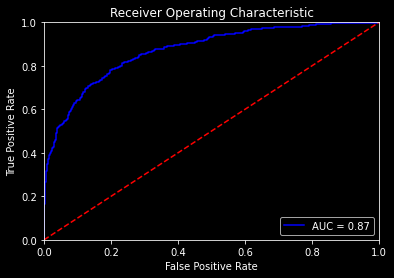

In [175]:
# вариант 3:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(test['Exited'], test['score_cat_all_features'])
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [176]:
# вариант 4: получить точки для кривой из самой библиотеки catboost
from catboost.utils import get_roc_curve

In [178]:
# сделаем пул для теста
test_data = Pool(
    data = test[X],
    label = test[y],
    cat_features = cat_features
    )                 

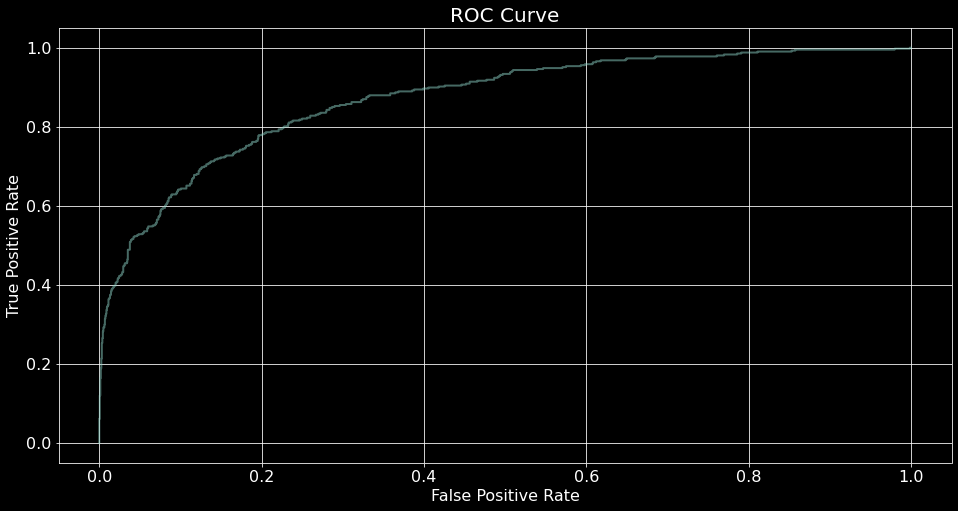

In [183]:
get_roc_curve(model, test_data, plot=True);

In [184]:
# AUC - площадь под рок кривой, максимальнаня = 1
from sklearn.metrics import roc_auc_score
roc_auc_score(test['Exited'], test['score_cat_all_features'])

0.8703063618317854

При обучении CatBoost по умолчанию метрика Log_loss,
но можно указать и roc-auc

In [185]:
params = {'eval_metric': 'AUC',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

In [186]:
# все фичи числовые, поэтому список категориальных передавать в катбуст не будем
model = CatBoostClassifier(**params)

In [188]:
model.fit(train_data, eval_set=valid_data)

0:	test: 0.8338545	best: 0.8338545 (0)	total: 35.5ms	remaining: 35.5s
100:	test: 0.8725090	best: 0.8725090 (100)	total: 1.74s	remaining: 15.5s
200:	test: 0.8784656	best: 0.8784656 (200)	total: 3.54s	remaining: 14.1s
300:	test: 0.8812676	best: 0.8812676 (300)	total: 5.16s	remaining: 12s
400:	test: 0.8823868	best: 0.8824376 (390)	total: 6.8s	remaining: 10.2s
500:	test: 0.8834491	best: 0.8834522 (498)	total: 8.4s	remaining: 8.36s
600:	test: 0.8834737	best: 0.8836554 (564)	total: 10.4s	remaining: 6.88s
700:	test: 0.8837847	best: 0.8838694 (685)	total: 12.4s	remaining: 5.28s
800:	test: 0.8834383	best: 0.8838694 (685)	total: 14s	remaining: 3.48s
900:	test: 0.8829318	best: 0.8838694 (685)	total: 15.6s	remaining: 1.72s
999:	test: 0.8822744	best: 0.8838694 (685)	total: 17.3s	remaining: 0us

bestTest = 0.8838694083
bestIteration = 685

Shrink model to first 686 iterations.


In [189]:
# видим, что на валидации roc-auc = 0.88

# ROC-AUC при сильно несбалансированных классах

становится менее чувствителен к FP

если повышается recall модели, но при этом повышается и FPR, roc продолжит расти

# Precision recall curve

поможет в ситуации, если нам важны FP

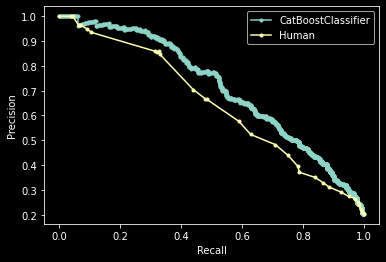

In [196]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision1, recall1, _ = precision_recall_curve(test['Exited'], test['score_cat_all_features'])
precision2, recall2, _ = precision_recall_curve(test['Exited'], test['score_NumProd_Age_Active'])

# plot the precision-recall curves
pyplot.plot(recall1, precision1, marker='.', label='CatBoostClassifier')
pyplot.plot(recall2, precision2, marker='.', label='Human')

# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [197]:
# видим, как на графике кэтбуст обгоняет человеческое обучение

In [198]:
# посчитать площадь под precision_recall_curve
from sklearn.metrics import average_precision_score

In [199]:
average_precision_score(test['Exited'], test['score_cat_all_features'])

0.7138074084585948

In [200]:
average_precision_score(test['Exited'], test['score_NumProd_Age_Active'])

0.6188502139157266

# Дисбаланс классов не проблема

Можно бороться:
- undersampling - выкидываем часть наблюдений бОльшего класса
- oversampling - генерация объектов недостающего класса
- регулировка весов при обучении


In [ ]:
# регулировка весов при обучении

In [203]:
params = {'auto_class_weights': 'Balanced', # автоматическая балансировка
          'eval_metric': 'AUC',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

In [204]:
# балансировка классов не влияет на качество кэтбуста
model = CatBoostClassifier(**params)
model.fit(train_data, eval_set=valid_data)

0:	test: 0.8310171	best: 0.8310171 (0)	total: 26.9ms	remaining: 26.8s
100:	test: 0.8726691	best: 0.8727215 (99)	total: 1.69s	remaining: 15s
200:	test: 0.8780837	best: 0.8781684 (199)	total: 3.6s	remaining: 14.3s
300:	test: 0.8805532	best: 0.8806579 (293)	total: 5.18s	remaining: 12s
400:	test: 0.8818510	best: 0.8818649 (397)	total: 5.94s	remaining: 8.88s
500:	test: 0.8821682	best: 0.8822452 (481)	total: 7.12s	remaining: 7.09s
600:	test: 0.8824284	best: 0.8826070 (561)	total: 8.51s	remaining: 5.65s
700:	test: 0.8823145	best: 0.8826070 (561)	total: 10.2s	remaining: 4.35s
800:	test: 0.8819619	best: 0.8826070 (561)	total: 11.3s	remaining: 2.81s
900:	test: 0.8814015	best: 0.8826070 (561)	total: 12.5s	remaining: 1.38s
999:	test: 0.8803392	best: 0.8826070 (561)	total: 14.2s	remaining: 0us

bestTest = 0.8826069687
bestIteration = 561

Shrink model to first 562 iterations.


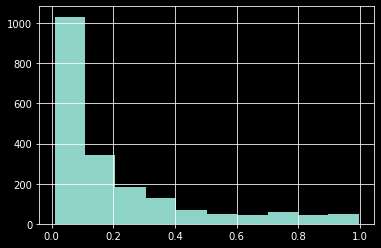

In [205]:
# но повлияет на распределение скоров
# вот старое без балансировки
test['score_cat_all_features'].hist()

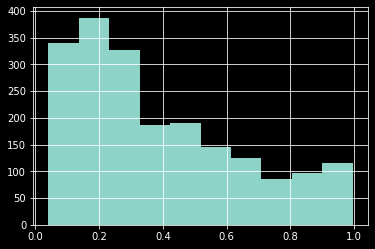

In [211]:
# новое после балансировки
pd.Series(model.predict_proba(test[X])[:,1]).hist()

In [214]:
# эти скоры уже менее правильные, они не отражают вероятность
# проверим
test['cat_not_balanced_bins'] = pd.cut(test['score_cat_all_features'], 10)

In [215]:
test.groupby('cat_not_balanced_bins')['Exited'].agg(['count', 'mean'])

,count,mean
cat_not_balanced_bins,,
"(0.00838, 0.108]",1032,0.043605
"(0.108, 0.207]",343,0.142857
"(0.207, 0.306]",184,0.260870
"(0.306, 0.405]",128,0.359375
"(0.405, 0.503]",69,0.434783
"(0.503, 0.602]",49,0.530612
"(0.602, 0.701]",42,0.595238
"(0.701, 0.8]",59,0.830508
"(0.8, 0.899]",45,0.911111


In [216]:
# тут мы видим истинные вероятности
# так, первая строка скоры 0...0,1 дают среднее (0+0,1)/2=0,05 --- 0,04
# вторая строка скоры 0,1...0,2 дают среднее (0,1+0,2)/2=0,15 --- 0,14
# Так, модель ОТКАЛИБРОВАНА

In [217]:
# повторим бинсы для нового, сбалансированного скора
test['cat_balanced'] = model.predict_proba(test[X])[:,1]

In [218]:
test['cat_balanced_bins'] = pd.cut(test['cat_balanced'], 10)

In [219]:
test.groupby('cat_balanced_bins')['Exited'].agg(['count', 'mean'])

,count,mean
cat_balanced_bins,,
"(0.0404, 0.137]",340,0.011765
"(0.137, 0.232]",387,0.036176
"(0.232, 0.328]",327,0.082569
"(0.328, 0.423]",187,0.139037
"(0.423, 0.518]",190,0.210526
"(0.518, 0.614]",146,0.191781
"(0.614, 0.709]",125,0.464000
"(0.709, 0.805]",85,0.447059
"(0.805, 0.9]",97,0.670103


In [220]:
(0.04+0.13)/2

0.085

In [222]:
# теперь полученный скор нельзя интерпретировать как вероятность

# Кросс-валидация

сравним с одной валидационной выборкой

In [225]:
# заново обучим кэтбуст без балансировки классов

# разбиение на традиционные выборки
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.6, random_state=42)
val, test = train_test_split(test, train_size=0.5, random_state=42)

In [226]:
# фичи и таргет
X = ['CustomerId', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']
y = ['Exited']

In [227]:
# Pool для кэтбуста
train_data = Pool(
    data = train[X],
    label = train[y],
    cat_features = cat_features
    )

valid_data = Pool(
    data = val[X],
    label = val[y],
    cat_features = cat_features
    )  
 
test_data = Pool(
    data = test[X],
    label = test[y],
    cat_features = cat_features
    )                 

In [231]:
# обучение модели на параметрах с метрикой AUC
params = {'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

model = CatBoostClassifier(**params)

In [232]:
model.fit(train_data, eval_set = valid_data)

0:	test: 0.8266520	best: 0.8266520 (0)	total: 25.1ms	remaining: 25s
100:	test: 0.8463596	best: 0.8463596 (100)	total: 1.61s	remaining: 14.4s
200:	test: 0.8528964	best: 0.8528964 (200)	total: 3.08s	remaining: 12.3s
300:	test: 0.8566407	best: 0.8567479 (294)	total: 4.38s	remaining: 10.2s
400:	test: 0.8585396	best: 0.8585932 (398)	total: 5.67s	remaining: 8.47s
500:	test: 0.8598294	best: 0.8598733 (499)	total: 6.4s	remaining: 6.37s
600:	test: 0.8604971	best: 0.8604971 (600)	total: 7.13s	remaining: 4.74s
700:	test: 0.8607456	best: 0.8608041 (674)	total: 7.86s	remaining: 3.35s
800:	test: 0.8607554	best: 0.8609470 (780)	total: 8.58s	remaining: 2.13s
900:	test: 0.8599188	best: 0.8609470 (780)	total: 9.31s	remaining: 1.02s
999:	test: 0.8592560	best: 0.8609470 (780)	total: 10.1s	remaining: 0us

bestTest = 0.8609470435
bestIteration = 780

Shrink model to first 781 iterations.


In [233]:
n_iters = model.best_iteration_ + 1

In [235]:
# обучимся на всех данных
params = {'iterations': n_iters,
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }
model = CatBoostClassifier(**params)

In [236]:
train_full = pd.concat([train, val])

In [237]:
train_full_data = Pool(train_full[X],
                       train_full[y],
                       cat_features = cat_features)

In [238]:
model.fit(train_full_data)

0:	total: 26.6ms	remaining: 20.7s
100:	total: 1.96s	remaining: 13.2s
200:	total: 3.81s	remaining: 11s
300:	total: 5.41s	remaining: 8.62s
400:	total: 7.34s	remaining: 6.96s
500:	total: 9.45s	remaining: 5.28s
600:	total: 11.3s	remaining: 3.38s
700:	total: 12.9s	remaining: 1.47s
780:	total: 14.5s	remaining: 0us


In [239]:
test['y_score_no_cross'] = model.predict_proba(test[X])[:,1]

In [242]:
roc_auc_score(test['Exited'], test['y_score_no_cross'])

0.8757235965042218

Теперь с кросс-валидацией

In [243]:
from catboost import cv

In [244]:
# те же параметры без количества итераций
params = {'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }

In [245]:
cv_data = cv(
    params = params,
    pool = train_full_data,
    fold_count = 5,
    shuffle = True,
    partition_random_seed = 42,
    stratified = False,
    verbose = False
)

Training on fold [0/5]

bestTest = 0.858415435
bestIteration = 768

Training on fold [1/5]

bestTest = 0.8560871775
bestIteration = 780

Training on fold [2/5]

bestTest = 0.8728980417
bestIteration = 771

Training on fold [3/5]

bestTest = 0.8829082837
bestIteration = 780

Training on fold [4/5]

bestTest = 0.8809012119
bestIteration = 570



In [246]:
cv_data # информация п каждой итерации

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.819423,0.012041,0.684893,0.000222,0.684809,0.000178
1,1,0.826859,0.009761,0.676999,0.000467,0.676843,0.000339
2,2,0.834723,0.008786,0.668531,0.000631,0.668325,0.000528
3,3,0.834656,0.010396,0.661895,0.001365,0.661625,0.000660
4,4,0.834892,0.009975,0.654181,0.001675,0.653828,0.001054
...,...,...,...,...,...,...,...
776,776,0.869973,0.012247,0.328758,0.019670,0.295398,0.004731
777,777,0.869953,0.012207,0.328750,0.019661,0.295341,0.004741
778,778,0.869955,0.012213,0.328747,0.019653,0.295287,0.004741
779,779,0.869977,0.012225,0.328736,0.019659,0.295218,0.004726


In [247]:
# найдем итерацию, на которой roc-auc было максимальным
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
780,780,0.869987,0.012231,0.328724,0.019657,0.295156,0.004712


In [252]:
cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0]

780

In [254]:
n_iters = cv_data[cv_data['test-AUC-mean'] == cv_data['test-AUC-mean'].max()]['iterations'].values[0]


In [255]:
# обучим модель с этой итерацией
params = {'iterations': n_iters,
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'verbose': 100,
          'random_seed': 42,
          'learning_rate': 0.01 # подберем параметр, чтобы bestIteration была ближе к концу(к 1000)
          }
model = CatBoostClassifier(**params)

In [256]:
model.fit(train_full_data)

0:	total: 23.8ms	remaining: 18.6s
100:	total: 2.06s	remaining: 13.9s
200:	total: 3.79s	remaining: 10.9s
300:	total: 5.82s	remaining: 9.26s
400:	total: 7.84s	remaining: 7.41s
500:	total: 9.77s	remaining: 5.44s
600:	total: 12.2s	remaining: 3.62s
700:	total: 14.2s	remaining: 1.6s
779:	total: 15.8s	remaining: 0us


In [257]:
test['y_score_cross'] = model.predict_proba(test[X])[:,1]

In [258]:
roc_auc_score(test['Exited'], test['y_score_cross'])

0.8757384091245742

In [259]:
# прирост по качеству почти не заметен, а по времени потери выше
# но это возможность получать более уверенные параметры

# Подбор гиперпараметров

In [261]:
model.get_all_params()

{'auto_class_weights': 'None',
 'bayesian_matrix_reg': 0.10000000149011612,
 'best_model_min_trees': 1,
 'boost_from_average': False,
 'boosting_type': 'Plain',
 'bootstrap_type': 'MVS',
 'border_count': 254,
 'class_names': [0, 1],
 'classes_count': 0,
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'counter_calc_method': 'SkipTest',
 'ctr_leaf_count_limit': 18446744073709551615,
 'ctr_target_border_count': 1,
 'depth': 6,
 'eval_metric': 'AUC',
 'feature_border_type': 'GreedyLogSum',
 'fold_permutation_block': 0,
 'force_unit_auto_pair_weights': False,
 'grow_policy': 'SymmetricTree',
 'has_time': False,
 'iterations': 780,
 'l2_leaf_reg': 3,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'leaf_estimation_iterations': 10,
 'leaf_estimation_method': 'Newton',
 'learning_rate': 0.009999999776482582,
 'loss_functio

In [262]:
params = {
          'eval_metric': 'AUC',
          'loss_function': 'Logloss',
          'verbose': 100,
          'random_seed': 42,
          }

model = CatBoostClassifier(**params)

In [264]:
# для подбора оптимальной комбинации параметов есть функция 
grid = {'learning_rate': [0.001, 0.01, 0.1],
        'depth': [5, 6]
        }

In [266]:
result = model.grid_search(grid, train_full_data, verbose=False)

0:	test: 0.7911621	best: 0.7911621 (0)	total: 13.5ms	remaining: 13.5s
100:	test: 0.8343896	best: 0.8379871 (4)	total: 1.32s	remaining: 11.7s
200:	test: 0.8336816	best: 0.8379871 (4)	total: 2.48s	remaining: 9.85s
300:	test: 0.8334521	best: 0.8379871 (4)	total: 3.67s	remaining: 8.54s
400:	test: 0.8344653	best: 0.8379871 (4)	total: 4.82s	remaining: 7.2s
500:	test: 0.8348535	best: 0.8379871 (4)	total: 6s	remaining: 5.98s
600:	test: 0.8352344	best: 0.8379871 (4)	total: 7.19s	remaining: 4.77s
700:	test: 0.8361475	best: 0.8379871 (4)	total: 8.35s	remaining: 3.56s
800:	test: 0.8368115	best: 0.8379871 (4)	total: 9.51s	remaining: 2.36s
900:	test: 0.8377686	best: 0.8379871 (4)	total: 10.7s	remaining: 1.17s
999:	test: 0.8390845	best: 0.8390845 (999)	total: 11.8s	remaining: 0us

bestTest = 0.8390844727
bestIteration = 999

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	test: 0.7911621	best: 0.7911621 (0)	total

In [267]:
# лучшие параметры
result['params']

{'depth': 6, 'learning_rate': 0.1}

In [268]:
# значение метрики на подобранных парамерах
pd.DataFrame(result['cv_results'])

,iterations,test-AUC-mean,test-AUC-std,test-Logloss-mean,test-Logloss-std,train-Logloss-mean,train-Logloss-std
0,0,0.814508,0.002044,0.617115,0.000407,0.615868,0.002229
1,1,0.823503,0.006155,0.558896,0.001854,0.557105,0.001505
2,2,0.830877,0.007933,0.512117,0.002664,0.509893,0.001914
3,3,0.833097,0.007944,0.478843,0.004214,0.475615,0.001489
4,4,0.837515,0.004256,0.458135,0.002598,0.453822,0.003094
...,...,...,...,...,...,...,...
995,995,0.835040,0.008301,0.402653,0.017442,0.064029,0.003409
996,996,0.835094,0.008388,0.402737,0.017480,0.063908,0.003408
997,997,0.835085,0.008371,0.402777,0.017512,0.063855,0.003401
998,998,0.835077,0.008422,0.402756,0.017552,0.063776,0.003417


In [269]:
pd.DataFrame(result['cv_results'])['test-AUC-mean'].max()

0.8646563638868071